In [1]:
import cv2
import os, os.path
from PIL import Image

import pandas as pd
import numpy as np
from numpy import pi
from numpy import r_
from scipy import fftpack
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install -q efficientnet_pytorch


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Відображення зображень з набору даних

<sup><sup><sup><sup> Перед початком потрібно скачати дані з Kaggle (файл занадто великий щоб запушити на гіт) </sup> </sup> </sup> </sup>

In [6]:
base_path = 'C:\\Users\\anast\\PycharmProjects\\test\\input\\alaska2-image-steganalysis'
def images_pathes_by_dir(dir_name='Cover', test = False):
    """
    Read images path's by given path to dir
    :param dir_name: Directory name
    :param test: Is it test dataset
    :return: Pathes to images
    """

    # Get all names of the files in current directory
    series_name = pd.Series(os.listdir(base_path + '/' + dir_name))
    if test:
        # Test directory differs from train, so it will be with other path
        series_name = pd.Series(os.listdir(base_path + '/' + 'Test'))

    # Create the full path for every file
    paths = pd.Series(base_path + '/' + dir_name + '/' + series_name)

    return paths

### Зчитування посилань на зображенння

In [7]:
cover_paths_to_files = images_pathes_by_dir('Cover', test=False)
jmipod_paths_to_files = images_pathes_by_dir('JMiPOD', test=False)
juniward_paths_to_files = images_pathes_by_dir('JUNIWARD', test=False)
uerd_paths_to_files = images_pathes_by_dir('UERD', test=False)
test_paths_to_files = images_pathes_by_dir('Test', test=True)


### 4 Зображення з набору з відповідним алгоритмом стеганографії

Text(0.5, 1.0, 'UERD')

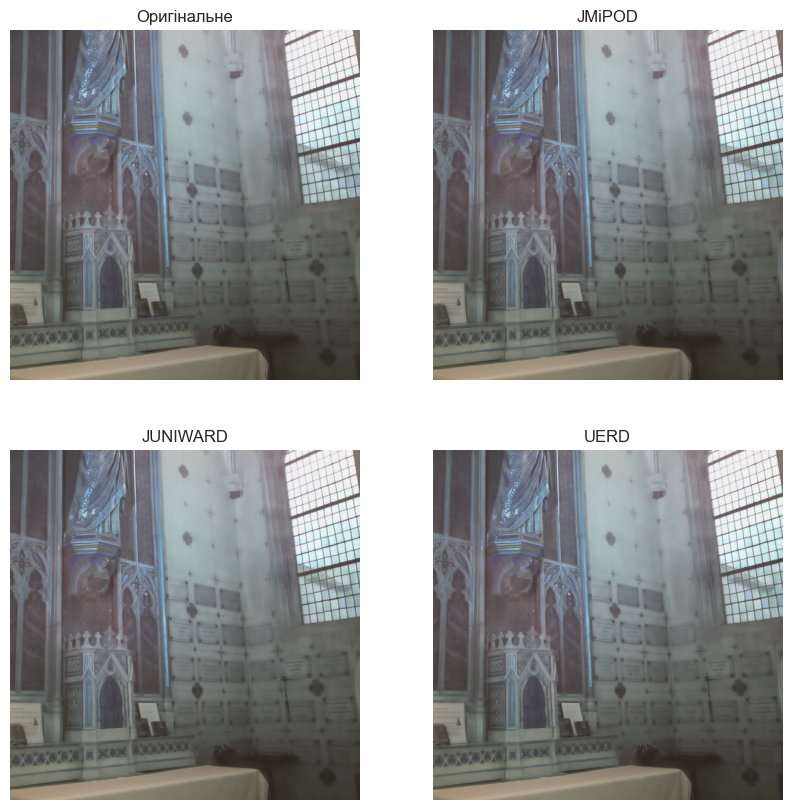

In [81]:

fig = plt.figure(figsize=(10, 10))
# setting values to rows and column variables
rows = 2
columns = 2

# reading images
Image1 = cv2.imread(cover_paths_to_files[72])
Image2 = cv2.imread(jmipod_paths_to_files[72])
Image3 = cv2.imread(juniward_paths_to_files[72])
Image4 = cv2.imread(uerd_paths_to_files[72])

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Оригінальне")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("JMiPOD")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("JUNIWARD")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("UERD")

### Перегляд існуючих зображень в наборі

In [8]:
def show_n_images_from_dataset(n=15):
    """
    Show n images from given dataset
    :return: plt figure
    """
    plt.figure(figsize=(16,9))
    plt.suptitle(f"{n} Зображень що присутні в наборі", fontsize = 16)

    for i, path_to_file in enumerate(cover_paths_to_files[15:n]):
        cover = mpimg.imread(path_to_file)

        plt.subplot(3, 5, i+1)
        plt.imshow(cover)
        plt.axis('off')


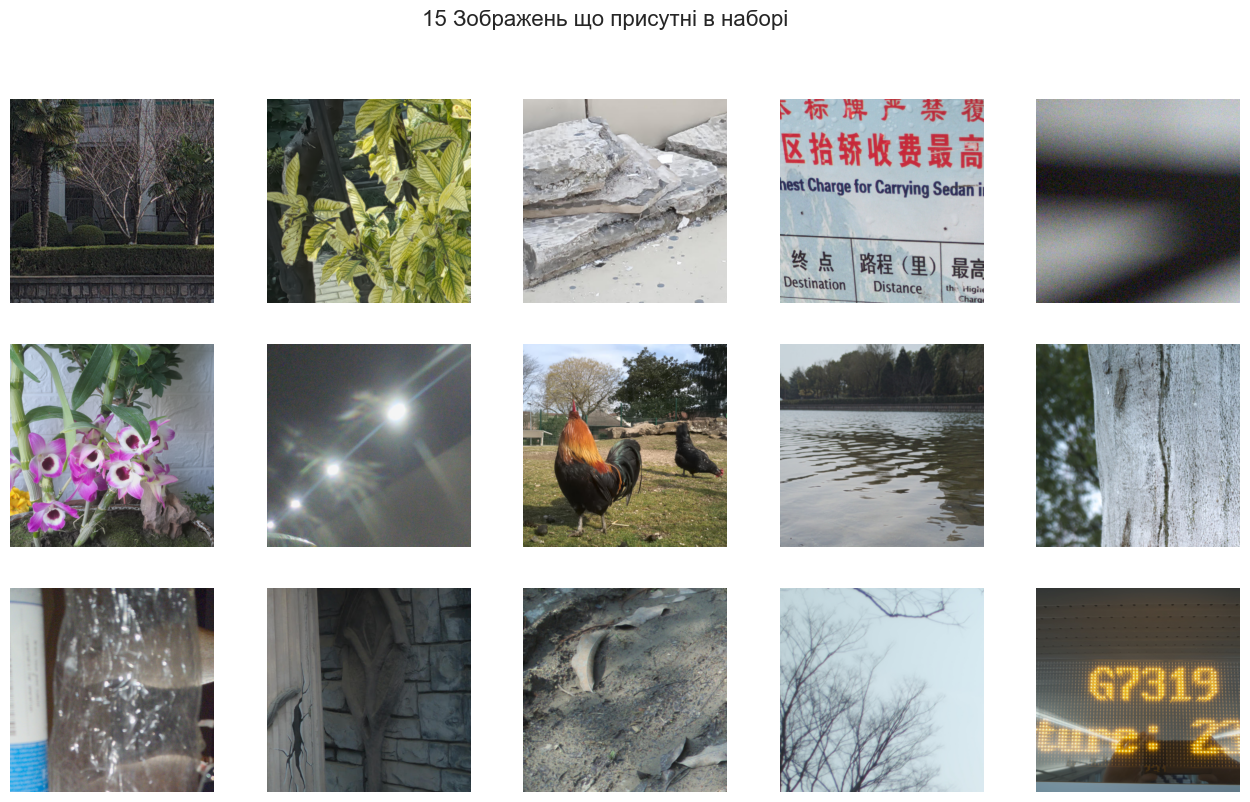

In [9]:
show_n_images_from_dataset(n=15)

### Параметри одного зображення

In [8]:
image_sample = mpimg.imread(cover_paths_to_files[0])

print('Image sample shape:', image_sample.shape)
print('Image sample size:', image_sample.size)
print('Image sample data type:', image_sample.dtype)

Image sample shape: (512, 512, 3)
Image sample size: 786432
Image sample data type: uint8


### Відображення різниці між алгоритмами

In [12]:
def image_to_steganography_algo(n=3):
    """
    Display grid of image by algorithm
    :param n: Number of images to plot
    :return: Plt figure
    """


    f, ax = plt.subplots(n, 4, figsize=(16, 7))
    plt.suptitle("Різниця між алгоритмами", fontsize = 16)

    ind = 190
    for index in range(n):
        cover = mpimg.imread(cover_paths_to_files[index+ind], format='.jpeg')
        ipod = mpimg.imread(jmipod_paths_to_files[index+ind])
        juni = mpimg.imread(juniward_paths_to_files[index+ind])
        uerd = mpimg.imread(uerd_paths_to_files[index+ind])

        # Plot
        ax[index, 0].imshow(cover)
        ax[index, 1].imshow(ipod)
        ax[index, 2].imshow(juni)
        ax[index, 3].imshow(uerd)

        # Add titles
        if index == 0:
            ax[index, 0].set_title('Original', fontsize=12)
            ax[index, 1].set_title('JMiPOd', fontsize=12)
            ax[index, 2].set_title('Juniward', fontsize=12)
            ax[index, 3].set_title('Uerd', fontsize=12)

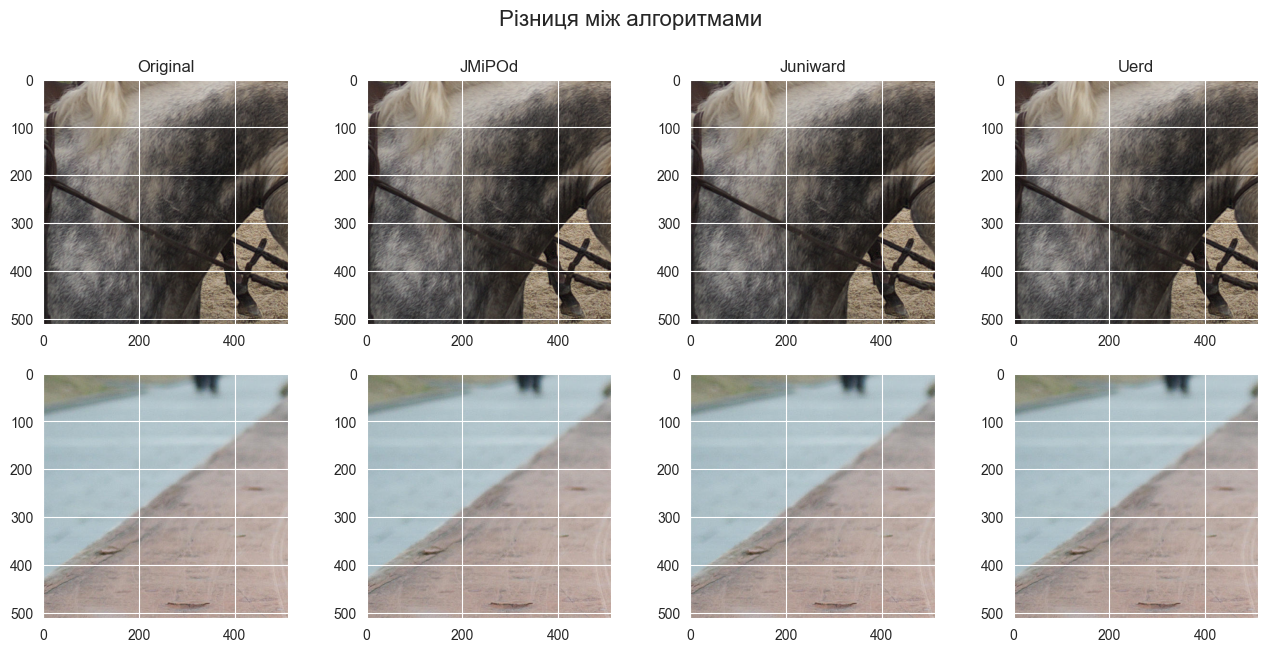

In [15]:
image_to_steganography_algo(n=2)

### Порівння Гістогам зображень

In [79]:
cover_histogram = {}
jmipod_histogram = {}
uerd_histogram = {}
juniward_histogram = {}

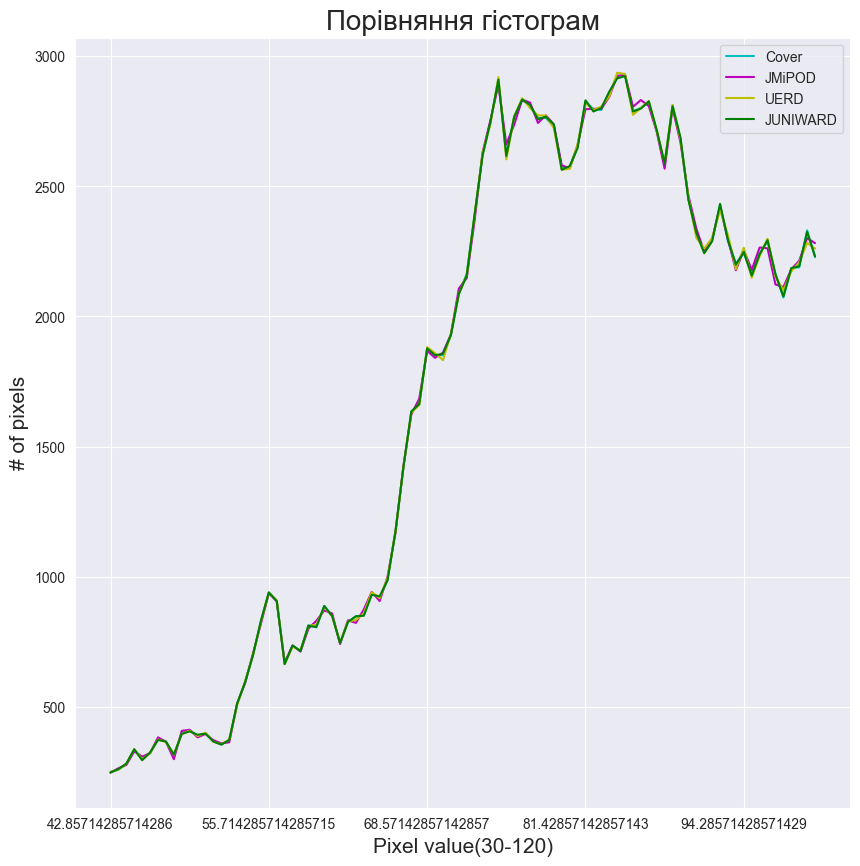

In [80]:
def hist_of_images(list_of_images, pixel_a_range=30, pixel_b_range=120):
    """
    Display histrograms of images
    :param list_of_images: list of 4 images
    :param pixel_a_range: Start of pixel range
    :param pixel_b_range: End of pixel range
    :return: plt figure
    """
    color = ('b','g','r')
    algorithms = ('Cover', 'JMiPOD', 'UERD', 'JUNIWARD')
    for i, col in enumerate(color):
        cover_histogram[col] = cv2.calcHist([list_of_images[0]],[i],None,[256],[0,256])
        jmipod_histogram[col] = cv2.calcHist([list_of_images[1]],[i],None,[256],[0,256])
        uerd_histogram[col] = cv2.calcHist([list_of_images[2]],[i],None,[256],[0,256])
        juniward_histogram[col] = cv2.calcHist([list_of_images[3]],[i],None,[256],[0,256])

    fig, ax = plt.subplots(figsize=(10,10))

    ax.plot(cover_histogram['r'][pixel_a_range:pixel_b_range], color = 'c', label=algorithms[0])
    ax.plot(jmipod_histogram['r'][pixel_a_range:pixel_b_range], color = 'm', label=algorithms[1])
    ax.plot(uerd_histogram['r'][pixel_a_range:pixel_b_range], color = 'y', label=algorithms[2])
    ax.plot(juniward_histogram['r'][pixel_a_range:pixel_b_range], color = 'g', label=algorithms[3])

    ax.set_ylabel('# of pixels', fontsize=15)
    ax.set_xlabel(f'Pixel value({pixel_a_range}-{pixel_b_range})', fontsize=15)

    ax.xaxis.set(ticklabels=np.linspace(pixel_a_range,pixel_b_range,8))
    ax.set_title('Порівняння гістограм', fontsize=20)
    ax.legend()

    plt.show()

hist_of_images([Image1, Image2, Image3, Image4])

### Відображення Ybcbr каналів

In [39]:
def display_ycbcr_images(n = 3):
    """
    Display ycbcr n images channels
    :param n: Number of images
    :return: Plt figure
    """

    fig, ax = plt.subplots(n, 5, figsize=(15, 5))
    plt.suptitle("YCbCr канали зображень", fontsize = 16)

    for index, path in enumerate(cover_paths_to_files[:n]):
        # Read in the original image from path and convert to ycbcr
        original_image = Image.open(path)
        ycbcr_image = original_image.convert('YCbCr')
        (y, cb, cr) = ycbcr_image.split()

        # Plot images
        ax[index, 0].imshow(original_image)

        ax[index, 1].imshow(ycbcr_image)

        ax[index, 2].imshow(y)
        ax[index, 3].imshow(cb)
        ax[index, 4].imshow(cr)


        # Add Title
        if index==0:
            ax[index, 0].set_title('Original', fontsize=12)
            ax[index, 1].set_title('YCbCr', fontsize=12)
            ax[index, 2].set_title('Y', fontsize=12)
            ax[index, 3].set_title('Cb', fontsize=12)
            ax[index, 4].set_title('Cr', fontsize=12)


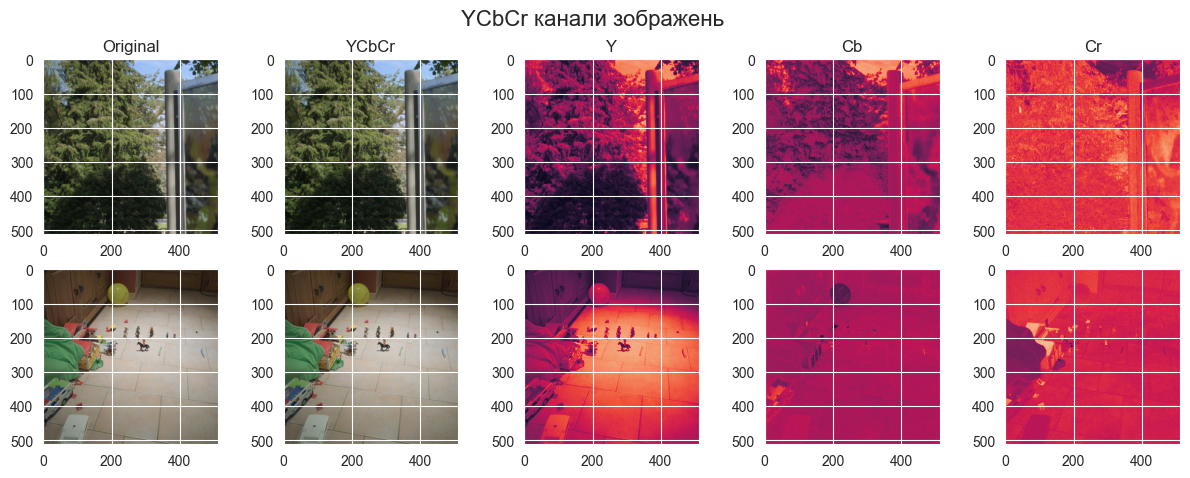

In [40]:
display_ycbcr_images(n=2)

### Робота з DCT зображення

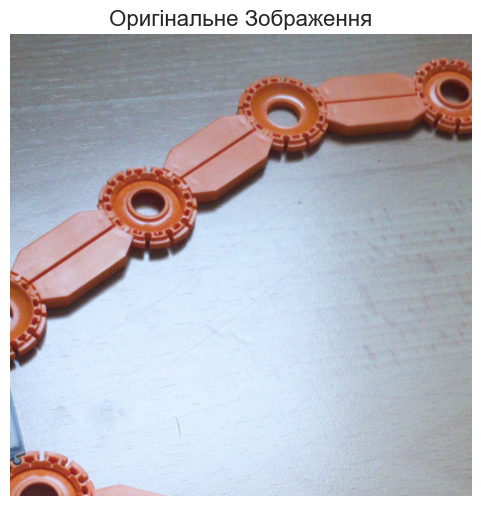

In [68]:
# Read in an Image Example
image_to_test = mpimg.imread(cover_paths_to_files[6])

plt.figure(figsize = (6, 6))
plt.imshow(image_to_test)
plt.title('Оригінальне Зображення', fontsize=16)
plt.axis('off')

In [69]:
block_size = 8

In [70]:
def discrete_coisine_transform(img):
    """
    Calculate dct
    :param img: Original image
    :return: discrete_coisine_transform
    """
    # Return the Discrete Cosine Transform of arbitrary type sequence x.
    return fftpack.dct(fftpack.dct(img, axis=0, norm='ortho' ), axis=1, norm='ortho')



In [71]:
def blockwise_DCT_for_img(image_, blocksize):
    """
    Calculate of dct for given image block
    :param image_: Original image
    :param blocksize: Size of block
    :return:
    """
    size_of_img = image_.shape
    dct = np.zeros(size_of_img)

    # Do 8x8 DCT on image (in-place)
    for i in r_[:size_of_img[0]:blocksize]:
        for j in r_[:size_of_img[1]:blocksize]:
            dct[i:(i+blocksize),j:(j+blocksize)] = discrete_coisine_transform( image_[i:(i+blocksize),j:(j+blocksize)] )
    return dct

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


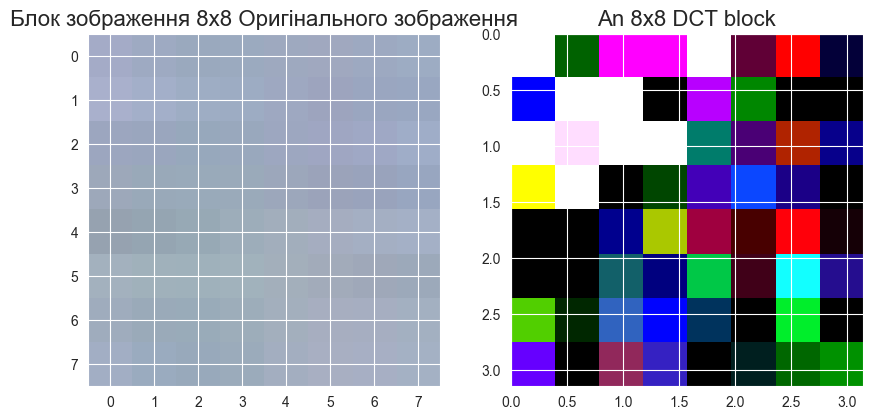

In [72]:
# ---- STATICS ----
pos = 128   # can be changed

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

# Display original
ax1.imshow(image_to_test[pos:pos+block_size,pos:pos+block_size],cmap='gray')
ax1.set_title(f"Блок зображення {block_size}x{block_size} Оригінального зображення", fontsize=16)

dct = blockwise_DCT_for_img(image_to_test, blocksize=block_size)
# Display the dct of that block
ax2.imshow(dct[pos:pos+block_size,pos:pos+block_size],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
ax2.set_title(f"An {block_size}x{block_size} DCT block", fontsize = 16);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

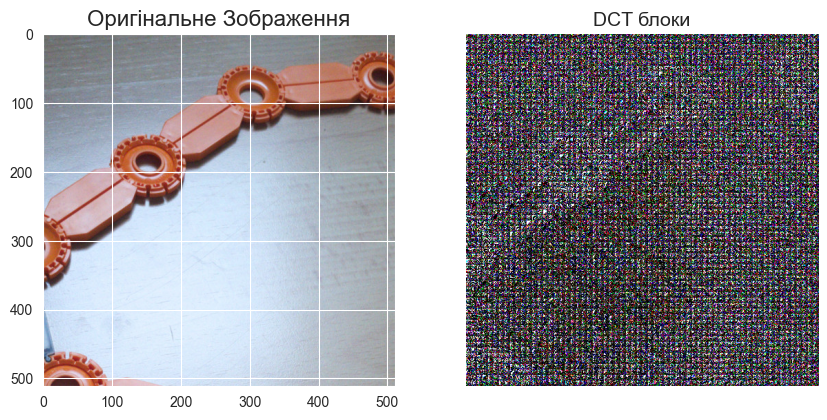

In [74]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

# Original image
ax1.imshow(image_to_test)
ax1.set_title("Оригінальне Зображення", fontsize = 16)

# DCT Blocks
ax2.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
ax2.set_title("DCT блоки", fontsize = 14)
plt.axis('off')

In [77]:
def threshold(image_, dct):
    """
    Display threshold of img
    :param image_: Original image
    :param dct: DCT of that image
    :return: Plt figure
    """
    size_of_img = image_.shape
    thresh = 0.02
    dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


    plt.figure(figsize=(14, 6))
    plt.imshow(dct_thresh, cmap='gray', vmax = np.max(dct)*0.01, vmin = 0)
    plt.title(f"Трешхолд {block_size}x{block_size} DCTs зображення", fontsize = 16)

    percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (size_of_img[0]*size_of_img[1]*1.0)
    print(percent_nonzeros)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


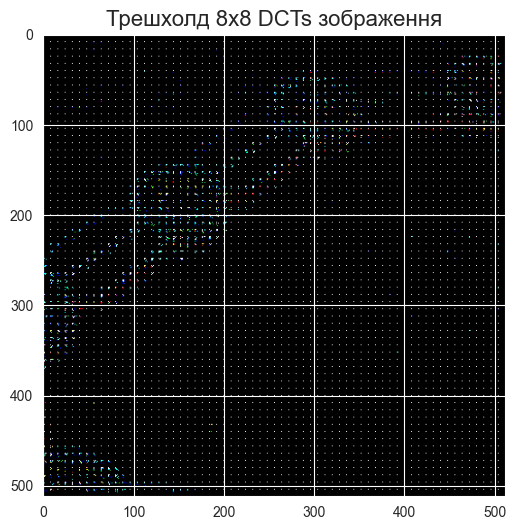

In [78]:
threshold(image_to_test, dct)